# Introduction 
This project consists in analysing the last 30 years measured wind in Dublin and the possible relationship to the climate change using the synoptic station in Dublin_Airport, Co Dublin. 
Source: https://data.gov.ie/dataset/dublin-airport-hourly-data

### 1.1 Preparing the environment
First, we must prepare the necessary working environment to start the analysis problem. This introductory section is divided as follows:
- Library installation.
- Load the dataset
- Check the data frame info 

First we need to explore and to understand the dataset, to run the program we need to import necessary libraries, like pandas and datetime.

In [2]:

# import pandas to use DataFrames
import pandas as pd

# import matplotlib to plot data representations
import matplotlib.pyplot as plt

# import seaborn to plot heatmaps
import seaborn as sns

The first 23 lines of the source CSV contains non-csv metadata, that give some context on the database. 

In [3]:
# Read the first 23 lines of the CSV as text to display the metadata
with open("wind.csv", "r") as file:
    for i in range(23):
        print(file.readline().rstrip())

Station Name: DUBLIN AIRPORT
Station Height: 71 M
Latitude:53.428  ,Longitude: -6.241


date:  -  Date and Time (utc)
rain:  -  Precipitation Amount (mm)
temp:  -  Air Temperature (C)
wetb:  -  Wet Bulb Temperature (C)
dewpt: -  Dew Point Temperature (C)
rhum:  -  Relative Humidity (%)
vappr: -  Vapour Pressure (hPa)
msl:   -  Mean Sea Level Pressure (hPa)
wdsp:  -  Mean Wind Speed (knot)
wddir: -  Predominant Wind Direction (degree)
ww:    -  Synop code for Present Weather
w:     -  Synop code for Past Weather
sun:   -  Sunshine duration (hours)
vis:   -  Visibility (m)
clht:  -  Cloud height (100's of ft) - 999 if none
clamt: -  Cloud amount
ind:   -  Indicator



Adding the dataset and verify if this was loaded properly.

In [4]:
# Load the dataset
# Skip the first 23 lines which contain metadata, then read the CSV
df = pd.read_csv("wind.csv", skiprows=23)

C:\Users\tanya\AppData\Local\Temp\ipykernel_19500\3178886404.py:3: DtypeWarning: Columns (8,9,14,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("wind.csv", skiprows=23)


In [5]:
# Display the first rows to get a clue of the data
df.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,01-jan-1945 00:00,2,0.0,0,4.9,0,4.6,4.4,8.2,95,...,1,0,1,0,50,4,0.0,200,2,8
1,01-jan-1945 01:00,3,0.0,0,5.1,0,4.9,4.4,8.5,97,...,1,0,1,0,45,4,0.0,200,2,8
2,01-jan-1945 02:00,2,0.0,0,5.1,0,4.8,4.4,8.5,97,...,1,0,1,0,50,4,0.0,4800,4,8
3,01-jan-1945 03:00,0,0.2,0,5.2,0,5.0,4.4,8.5,97,...,1,0,1,0,50,4,0.0,6000,4,8
4,01-jan-1945 04:00,2,0.0,0,5.6,0,5.4,5.0,8.8,97,...,1,7,1,250,50,5,0.0,6000,4,8


To have more information about the dataset and check what info it's usefull for the analysis we can use: 
- The df.shape to get the number of rows and columns.
- The df.info for a glimpse on the data frame content.

In [6]:
# number of rows and columns
df.shape

(709297, 21)

In [7]:
# info of the data frame
df.info

<bound method DataFrame.info of                      date  ind  rain  ind.1  temp  ind.2  wetb  dewpt vappr  \
0       01-jan-1945 00:00    2   0.0      0   4.9      0   4.6    4.4   8.2   
1       01-jan-1945 01:00    3   0.0      0   5.1      0   4.9    4.4   8.5   
2       01-jan-1945 02:00    2   0.0      0   5.1      0   4.8    4.4   8.5   
3       01-jan-1945 03:00    0   0.2      0   5.2      0   5.0    4.4   8.5   
4       01-jan-1945 04:00    2   0.0      0   5.6      0   5.4    5.0   8.8   
...                   ...  ...   ...    ...   ...    ...   ...    ...   ...   
709292  30-nov-2025 20:00    0   0.6      0   7.0      0   6.6    6.0   9.4   
709293  30-nov-2025 21:00    2   0.0      0   9.7      0   8.4    7.0  10.0   
709294  30-nov-2025 22:00    0   1.2      0   9.7      0   8.9    8.0  10.8   
709295  30-nov-2025 23:00    0   0.7      0  10.0      0   9.2    8.3  11.0   
709296  01-dec-2025 00:00    0   0.3      0  10.8      0   9.8    8.8  11.3   

       rhum  ...  i

We can use the `describe` method to check the dispersion and shape of a dataset’s distribution, excluding NaN values.

In [8]:
# describe the data frame
df.describe()

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,msl,ind.3,wdsp,ind.4,ww,w,sun
count,709297.000000,709297.000000,709297.000000,709297.000000,709297.000000,709297.000000,709297.000000,709297.000000,709297.000000,709297.000000,709297.000000,709297.000000,709297.000000,709297.000000
mean,0.632851,0.086648,0.014224,9.664489,0.029308,8.224054,6.603725,1013.584091,1.353533,10.114264,1.353712,15.596149,17.181295,0.167409
std,1.101539,0.418524,0.118687,4.893245,0.257702,4.409004,4.592909,12.347392,0.808965,5.680150,0.809007,22.553069,24.214145,0.326679
min,0.000000,0.000000,0.000000,-11.500000,0.000000,-11.500000,-17.700000,944.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,6.100000,0.000000,5.100000,3.300000,1006.200000,1.000000,6.000000,1.000000,2.000000,2.000000,0.000000
50%,0.000000,0.000000,0.000000,9.700000,0.000000,8.400000,6.900000,1014.800000,2.000000,9.000000,2.000000,2.000000,11.000000,0.000000
75%,2.000000,0.000000,0.000000,13.200000,0.000000,11.600000,10.000000,1022.200000,2.000000,14.000000,2.000000,21.000000,11.000000,0.100000
max,6.000000,26.500000,2.000000,29.100000,6.000000,22.200000,20.500000,1048.700000,6.000000,46.000000,7.000000,97.000000,99.000000,1.000000


### 1.2 Cleaning the data set.
This section is divided as follows:

- Rename columns needed for the analysis.
- Delete columns not needed for the analysis. 
- Verification of the columns to change datetime if needed.
- Filter data, to study only the last 3 decades (1995 - 2025)
- Check NaN values
- Save a new dataset with clean and filter data.

We will select only the columns that are directly related to wind speed and its climatic interpretation, renaming them to have understandable names.

In [9]:
# rename the columns

df = df.rename(columns={
    'date': 'date and time', 
    'temp': 'air temperature', 
    'wdsp': 'mean wind speed', 
    'wddir': 'wind direction'})
df.head()

,date and time,ind,rain,ind.1,air temperature,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,mean wind speed,ind.4,wind direction,ww,w,sun,vis,clht,clamt
0,01-jan-1945 00:00,2,0.0,0,4.9,0,4.6,4.4,8.2,95,...,1,0,1,0,50,4,0.0,200,2,8
1,01-jan-1945 01:00,3,0.0,0,5.1,0,4.9,4.4,8.5,97,...,1,0,1,0,45,4,0.0,200,2,8
2,01-jan-1945 02:00,2,0.0,0,5.1,0,4.8,4.4,8.5,97,...,1,0,1,0,50,4,0.0,4800,4,8
3,01-jan-1945 03:00,0,0.2,0,5.2,0,5.0,4.4,8.5,97,...,1,0,1,0,50,4,0.0,6000,4,8
4,01-jan-1945 04:00,2,0.0,0,5.6,0,5.4,5.0,8.8,97,...,1,7,1,250,50,5,0.0,6000,4,8


Delete the columns we don't need for the aim of this analysis:
- Wet Bulb Temperature: It's a variable derived from temperature and humidity. and It's not a direct indicator of long-term climate change.
- Dew Point Temperature: Doesn't directly explain wind variability.
- Vapour Pressure: Doesn't provide clear additional information for the aim of the analysis.
- Wind Direction: It doesn't directly contribute to the climate analysis of wind resources.
- Sunshine Duration: Related to solar radiation, irrelevant for this subject.
- Visibility: No direct relationship with climatic wind.
- 'clht' and 'clamt': High hourly variability, irrelevant for this analysis.
- 'ww' and 'w': Are Synop Weather Codes, they are not useful for quantitative climate analysis. 

Source: https://share.google/aimode/kygrfjkFQxoGu4PfZ

In [10]:
# delete the columns
df = df.drop(columns=['wetb', 'dewpt', 'vappr', 'sun', 'msl', 'w' ,'ww', 'vis', 'clht', 'clamt'])
df.head()


,date and time,ind,rain,ind.1,air temperature,ind.2,rhum,ind.3,mean wind speed,ind.4,wind direction
0,01-jan-1945 00:00,2,0.0,0,4.9,0,95,1,0,1,0
1,01-jan-1945 01:00,3,0.0,0,5.1,0,97,1,0,1,0
2,01-jan-1945 02:00,2,0.0,0,5.1,0,97,1,0,1,0
3,01-jan-1945 03:00,0,0.2,0,5.2,0,97,1,0,1,0
4,01-jan-1945 04:00,2,0.0,0,5.6,0,97,1,7,1,250


We will delete `ind` columns because they are not needed due it's not a value of a category in analysis. To delete several columns starting with the word `ind` even if we have another value after the word, we can use the `startswith()` method. 

Source: https://www.w3schools.com/python/ref_string_startswith.asp

In [11]:
# delete the columns with name starting with `ind`
df = df.loc[:, ~df.columns.str.startswith('ind')]
df.head()

,date and time,rain,air temperature,rhum,mean wind speed,wind direction
0,01-jan-1945 00:00,0.0,4.9,95,0,0
1,01-jan-1945 01:00,0.0,5.1,97,0,0
2,01-jan-1945 02:00,0.0,5.1,97,0,0
3,01-jan-1945 03:00,0.2,5.2,97,0,0
4,01-jan-1945 04:00,0.0,5.6,97,7,250


Verify the `df.types`, to know if we need to change the datetime format, for better analysis.

In [12]:
df.dtypes

date and time       object
rain               float64
air temperature    float64
rhum                object
mean wind speed      int64
wind direction      object
dtype: object

Date and time is already an object, most likely a datetime. However, to ensure it handled as datetime, we're going to cast it as such and use it as an index.

In [13]:
df['date and time'] = df['date and time'].astype('datetime64[ns]')

# Set the 'Date and Time' column as the index
df.set_index('date and time', inplace=True)
df = df.sort_index()
df.head()


,rain,air temperature,rhum,mean wind speed,wind direction
date and time,,,,,
1945-01-01 00:00:00,0.0,4.9,95,0,0
1945-01-01 01:00:00,0.0,5.1,97,0,0
1945-01-01 02:00:00,0.0,5.1,97,0,0
1945-01-01 03:00:00,0.2,5.2,97,0,0
1945-01-01 04:00:00,0.0,5.6,97,7,250


In [14]:
# verify the columns
df.columns

Index(['rain', 'air temperature', 'rhum', 'mean wind speed', 'wind direction'], dtype='object')

In [15]:
# verify the index
df.index


DatetimeIndex(['1945-01-01 00:00:00', '1945-01-01 01:00:00',
               '1945-01-01 02:00:00', '1945-01-01 03:00:00',
               '1945-01-01 04:00:00', '1945-01-01 05:00:00',
               '1945-01-01 06:00:00', '1945-01-01 07:00:00',
               '1945-01-01 08:00:00', '1945-01-01 09:00:00',
               ...
               '2025-11-30 15:00:00', '2025-11-30 16:00:00',
               '2025-11-30 17:00:00', '2025-11-30 18:00:00',
               '2025-11-30 19:00:00', '2025-11-30 20:00:00',
               '2025-11-30 21:00:00', '2025-11-30 22:00:00',
               '2025-11-30 23:00:00', '2025-12-01 00:00:00'],
              dtype='datetime64[ns]', name='date and time', length=709297, freq=None)

As we can see, the data starts from 1945, but we only need 30 years for the analysis, from 1995 to 2025, so we can ignore the years prior to this period.

In [16]:
# Filter the data for the years 1995 to 2025
df = df.loc['1995-01-01':'2025-12-31']
print(df.head())

                     rain  air temperature rhum  mean wind speed  \
date and time                                                      
1995-01-01 00:00:00   0.0             -0.7   98               11   
1995-01-01 01:00:00   0.0             -0.8   98               11   
1995-01-01 02:00:00   0.0             -1.2  100               11   
1995-01-01 03:00:00   0.0             -1.3  100                9   
1995-01-01 04:00:00   0.0             -0.5  100               10   

                    wind direction  
date and time                       
1995-01-01 00:00:00            280  
1995-01-01 01:00:00            280  
1995-01-01 02:00:00            280  
1995-01-01 03:00:00            270  
1995-01-01 04:00:00            270  


The dataset mesures the wind speed in knots. To follow the international standard, we change it to meters per second (m/s).

Source: https://share.google/aimode/Py9CUXm0ByMYwoZGp

In [17]:
# Convert wind speed from knots to m/s
# One knot is equal to 0.514444 meters per second
df['mean wind speed'] = df['mean wind speed'] * 0.514444

# verify the conversion
df.describe()

,rain,air temperature,mean wind speed
count,271009.000000,271009.000000,271009.000000
mean,0.088512,9.866914,5.283643
std,0.422295,5.021105,2.736394
min,0.000000,-11.500000,0.000000
25%,0.000000,6.300000,3.086664
50%,0.000000,10.000000,4.629996
75%,0.000000,13.500000,6.687772
max,26.500000,29.100000,23.149980


Verify if there are NaN values and to fix them if needed.

In [18]:
# check for NaN values
df.isnull().sum()

rain               0
air temperature    0
rhum               0
mean wind speed    0
wind direction     0
dtype: int64

Now that we already deleted unneeded columns and renamed columns we need for the analisys, and to set 'date' as a datetime, we can create a new CSV file with the clean data.

In [19]:
# save the clean data
df.to_csv('wind_for_analysis.csv')

# verify the new CSV file
df_clean = pd.read_csv('wind_for_analysis.csv')
df_clean.head()


C:\Users\tanya\AppData\Local\Temp\ipykernel_19500\799225448.py:5: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clean = pd.read_csv('wind_for_analysis.csv')


,date and time,rain,air temperature,rhum,mean wind speed,wind direction
0,1995-01-01 00:00:00,0.0,-0.7,98,5.658884,280
1,1995-01-01 01:00:00,0.0,-0.8,98,5.658884,280
2,1995-01-01 02:00:00,0.0,-1.2,100,5.658884,280
3,1995-01-01 03:00:00,0.0,-1.3,100,4.629996,270
4,1995-01-01 04:00:00,0.0,-0.5,100,5.144440,270


## 2. General Analysis of wind
General analysis of wind in Dublin over the last 3 decades.

This section is divided as follows:
- Group the data by month, year for better analysis.
- Explore wind speed and direction trends over the past three decades.

Now that we have a clean dataset, without unnecessary columns, informational rows, and with renamed columns, we can continue with the analysis. 

The CSV data is hourly to better organize the data, considering the amount, it's best to group it by month and year.
We can use 'resample()' to group dates.

Source: https://pandas.pydata.org/docs/reference/api/pandas.Series.resample.html 

In [20]:
# group by month and calculate wind monthly mean
'''using ME instad 'M', as it will be deprecated in future versions'''
df_monthly = df.resample('ME')['mean wind speed'].mean()
df_monthly.head()

date and time
1995-01-31    6.859253
1995-02-28    7.353028
1995-03-31    6.956057
1995-04-30    5.209460
1995-05-31    4.688770
Freq: ME, Name: mean wind speed, dtype: float64

In [21]:
# group by year and calculate wind anual mean
'''using YE instad 'Y', as it will be deprecated in future versions'''
df_yearly = df.resample('YE')['mean wind speed'].mean()
df_yearly.head()

date and time
1995-12-31    5.374237
1996-12-31    5.338469
1997-12-31    5.093818
1998-12-31    5.474894
1999-12-31    5.445178
Freq: YE-DEC, Name: mean wind speed, dtype: float64

We can start to have the visualization of the wind annual mean.

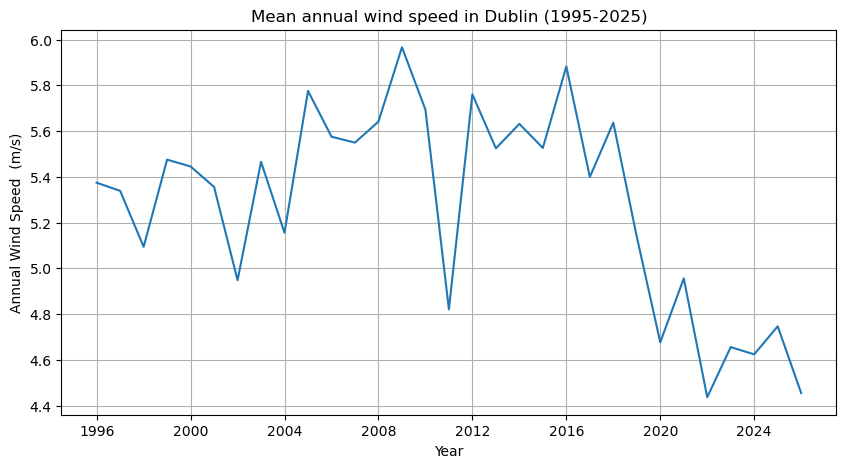

In [22]:
plt.figure(figsize=(10,5))
plt.plot(df_yearly.index, df_yearly.values)
plt.xlabel("Year")
plt.ylabel("Annual Wind Speed  (m/s)")
plt.title("Mean annual wind speed in Dublin (1995-2025)")
plt.grid(True)
plt.show()

We can visualize the historical distribution of wind speed during the last 30 years.

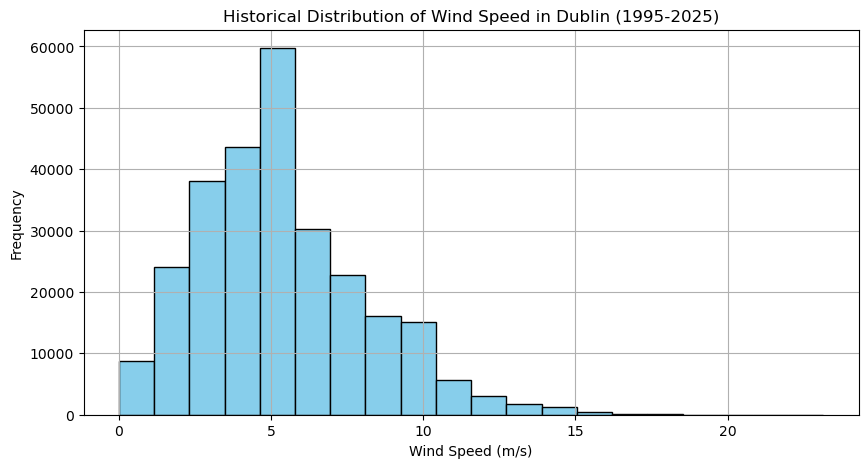

In [23]:
# historical distribution of wind speed
plt.figure(figsize=(10,5))
plt.hist(df['mean wind speed'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.title("Historical Distribution of Wind Speed in Dublin (1995-2025)")
plt.grid(True)
plt.show()

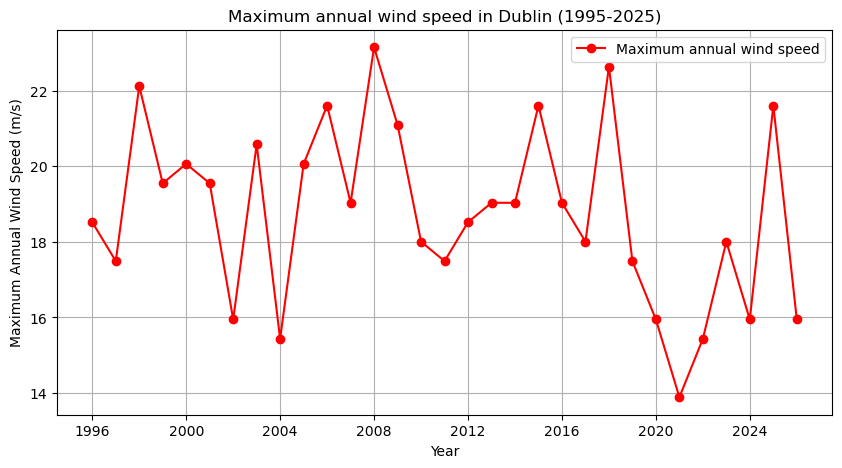

In [24]:
# Plot the maximum anual speed

# Group by year and calculate maximum annual wind speed
'''using YE instead of 'Y', as it will be deprecated in future versions'''
df_yearly_max = df.resample('YE')['mean wind speed'].max()

# Plot the maximum annual wind speed
plt.figure(figsize=(10,5))
plt.plot(df_yearly_max.index, df_yearly_max.values, marker='o', color='red', label='Maximum annual wind speed')
plt.xlabel("Year")
plt.ylabel("Maximum Annual Wind Speed (m/s)")
plt.title("Maximum annual wind speed in Dublin (1995-2025)")
plt.grid(True)
plt.legend()
plt.show()

From the graph above, we can observe a range of values, approximately between 14 m/s and 23 m/s, which indicates significant fluctuations in extreme wind events.

1997, 2008, and 2018 show some of the highest values, exceeding 22 m/s.

The absolute maximum appears to have occurred around 2008, close to 23 m/s, suggesting a year with particularly intense wind events.

The maximum annual wind in Dublin shows irregular behavior, typical of extreme weather phenomena.

We can delve deeper by analysing whether wind speed can change during any period of the year, for example, a specific season.

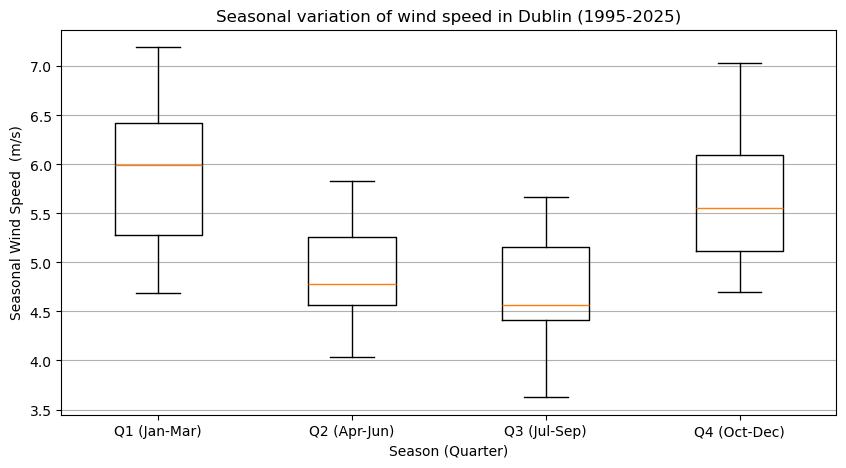

In [ ]:
# season analysis of wind speed
'''using QE instad 'Q' as it will be deprecated in future versions'''
''' We use 'Q' to group by quarter'''
df_seasonal = df.resample('QE')
windspeed_mean = df_seasonal['mean wind speed'].mean()
windspeed_mean.head()

# plot the seasonal data as boxplot grouped by quarter

plt.figure(figsize=(10,5))
# Extract quarter from index and prepare data for boxplot
windspeed_df = windspeed_mean.reset_index()
windspeed_df['quarter'] = windspeed_df['date and time'].dt.quarter

# Group by quarter and create boxplot
data_by_quarter = [windspeed_df[windspeed_df['quarter'] == q]['mean wind speed'].values 
                   for q in [1, 2, 3, 4]]
plt.boxplot(data_by_quarter, tick_labels=['Q1 (Jan-Mar)', 'Q2 (Apr-Jun)', 'Q3 (Jul-Sep)', 'Q4 (Oct-Dec)'])
plt.xlabel("Season (Quarter)")
plt.ylabel("Seasonal Wind Speed  (m/s)")
plt.title("Seasonal variation of wind speed in Dublin (1995-2025)")
plt.grid(True, axis='y')
plt.show()


From the boxplot above, we can see that the fastest (strongest) winds are in the winter quarter, and the slowest are in summer. 
The wind speed order by season (going from fastest to slowest) are:
- Q1 (Winter): median - 6.0 m/s

- Q4 (Autumn): median - 5.5–5.6 m/s

- Q2 (Spring): median - 4.8 m/s

- Q3 (Summer): median - 4.5–4.6 m/s

The height of the boxes (IQR) indicates:

- Greater variability in winter and autumn

- More storms and fronts

- Less variability in summer

- More stable conditions


The whiskers indicates:

- Q1 and Q4 reach maximums close to 7–7.2 m/s.

- Q3 has lower minimums (3.6–3.7 m/s).

Interpretation:

Strong wind events are concentrated in cold months.

Calm conditions predominate in summer.

Now we can check the tendency during these three decades. This can help us understand the changes over time, whether these values are trending, decreased or stable.

In [ ]:
# Calculate the tendency
nineties_wind = df_yearly.loc['1995':'2005'].mean()
late_wind  = df_yearly.loc['2015':'2025'].mean()

trend = (late_wind - nineties_wind) / 20
print(f"The tendency of wind speed in Dublin is {trend:.2f} m/s per year.")

In [ ]:
# Calculate the tendency per decade
trend_decade = trend * 10
print(f"The tendency of wind speed in Dublin is {trend_decade:.2f} m/s per decade.")

We can calculate the tendency per 30 years, to verify visualy how the values are during these three decades.

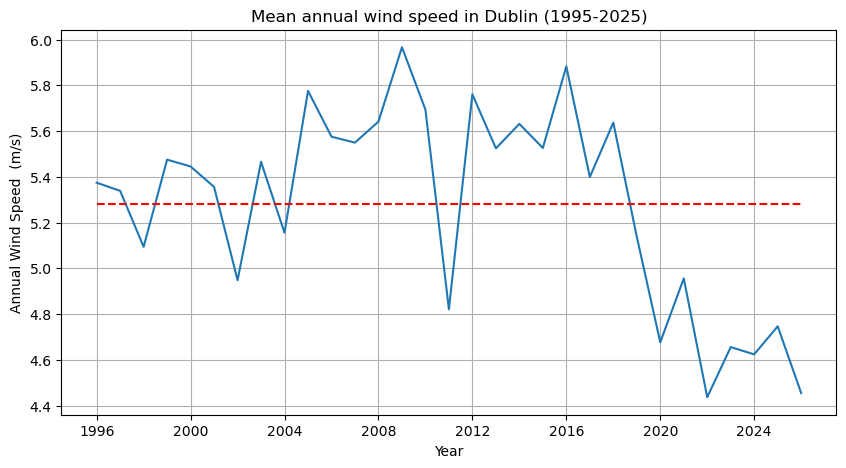

In [28]:
# plot the tendency
plt.figure(figsize=(10,5))
plt.plot(df_yearly.index, df_yearly.values, label='Mean annual wind speed')
early = df_yearly.loc['1995':'2025']
mean_early = early.mean()
plt.hlines(mean_early, early.index.min(), early.index.max(),
           linestyles='--', color='red', label="Media 1995–2025")
plt.xlabel("Year")
plt.ylabel("Annual Wind Speed  (m/s)")
plt.title("Mean annual wind speed in Dublin (1995-2025)")
plt.grid(True)

From the previous graph we can see the average annual speed ranges is approximately between 4.4 m/s and 6.0 m/s.

From approximately 2016 onward, the trend has been going down.
Most recent years have been below the historical average, suggesting a weakening of average wind speeds in Dublin over the past decade.

End